In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%run ./utils.py

In [2]:
df = pd.DataFrame()
%run ./graph.py

In [3]:
df

,repo,commit,date,unix,Markdown,go,rust,swift,haskell,elm,...,c#,python,vim,alloy,dart,csv,glsl,wgsl,julia,zig
0,nom,38010665593e33d1f8d5ee83fa0b18cd899b8734,2014-10-27 18:21:04 +0100,1414430464,0,0,73,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,nom,607556fdd2706ca1536386fa5c95bb86a7078e70,2014-10-27 18:28:54 +0100,1414430934,0,0,81,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,nom,d970d6f09b99f102451bb5a9d347c5cdb38b9539,2014-11-05 23:36:52 +0100,1415227012,0,0,133,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,nom,2820169dc2974f4b9ae5d89625330b63e63039c5,2014-11-06 15:47:23 +0100,1415285243,0,0,167,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,nom,de7c21c7c4574dbcaa9c396d894866984adb09cf,2014-11-07 14:35:36 +0100,1415367336,0,0,235,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18085,GitHubHistory,b6c210e764b7cda0b87a31de77826478a9d9fdaa,2022-11-27 13:07:30 +0100,1669550850,68976,2326,429022,801,1284,0,...,0,1345,352,138,23232,104746,0,663,676,0
18086,GitHubHistory,5c3575547848876f7e826b33098ccd61adf85548,2022-11-27 14:00:06 +0100,1669554006,68976,2326,429022,801,1284,0,...,0,1410,352,138,23232,104746,0,663,676,0
18087,GitHubHistory,626ec8762f4a2ad16cde2001ef78dfdd7f74bfa1,2022-11-27 14:00:17 +0100,1669554017,68976,2326,429022,801,1284,0,...,0,1500,352,138,23232,104746,0,663,676,0
18088,GitHubHistory,80f9279d0fac76098ffd07d7dffe439981380b2a,2022-11-27 14:02:01 +0100,1669554121,68976,2326,429022,801,1284,0,...,0,1502,352,138,23232,104746,0,663,676,0


In [4]:
# clean data.
# first get to know which projects are not mine, but forks
# e.g. druid

out = 'druid firenvim compute-shader-101 alacritty-themes prism samples neovide RustaCUDA vv zig.vim ZLUDA rust-blog terramarch neovim-qt'.split(
    " ")
out += "sorry-cypress vim-rust mun mailslurp-client-go ultraviolet codi.vim coc.nvim inkwell rust-csv haskell-ide-engine".split(" ")
out += "typescript-eslint clima simplejit-demo charts bevy-cookbook Flux.jl ZLUDA".split(" ")

d = df
for o in out:
    d = df[df['repo'] != o]

set(d['repo'])


{'AdventOfCode2020',
 'B-Tree-in-python',
 'Barnsley-s-Chaos-Game',
 'Codewars',
 'Computer-Science',
 'F2',
 'Fiberlight',
 'GamedevProject',
 'GitHubHistory',
 'Glass',
 'Human-Computer-Interaction',
 'LOOP',
 'Linked-List-Cpp-',
 'List',
 'Loop-Examples',
 'Notes-App',
 'OS-doodle',
 'Paint.kt',
 'RustKit',
 'Sudoku',
 'TikTok',
 'Todo',
 'act',
 'add',
 'ai-lecture',
 'ai-race',
 'alias_extractor',
 'alloc',
 'alloy-html',
 'anybox',
 'aoc',
 'aoc-2021',
 'appstore',
 'awaitchange',
 'basic-frame-of-reference',
 'binaryVisualizer',
 'bintable',
 'blog',
 'boundless-canvas',
 'bsc-connect-to-vertica',
 'bsc-ratio-matrix',
 'bsc-stream-bintables',
 'bsc-sync-repo-script',
 'bsc-table-to-file',
 'bunsay',
 'byte-distribution',
 'calc',
 'calender',
 'config',
 'cross-prod',
 'crystaldoodle',
 'curse',
 'datetime',
 'dc',
 'dict-front-coding',
 'dijkstra',
 'dioxus',
 'docs',
 'doodle_nom5',
 'druid-update',
 'dynamath',
 'elm-llv-elm',
 'extra.rs',
 'fail',
 'fi',
 'fibonacci_search',

In [5]:
for x,y in filetypes:
    print(y)

Markdown
go
rust
swift
haskell
elm
javascript
css
html
typescript
react (typescript)
react (javascript)
c
header
c++
c++
c++
toml
yaml
json
shell
shell
shell
crystal
solar
java
kotlin
clojure
lisp
c#
python
vim
alloy
dart
csv
glsl
wgsl
julia
zig


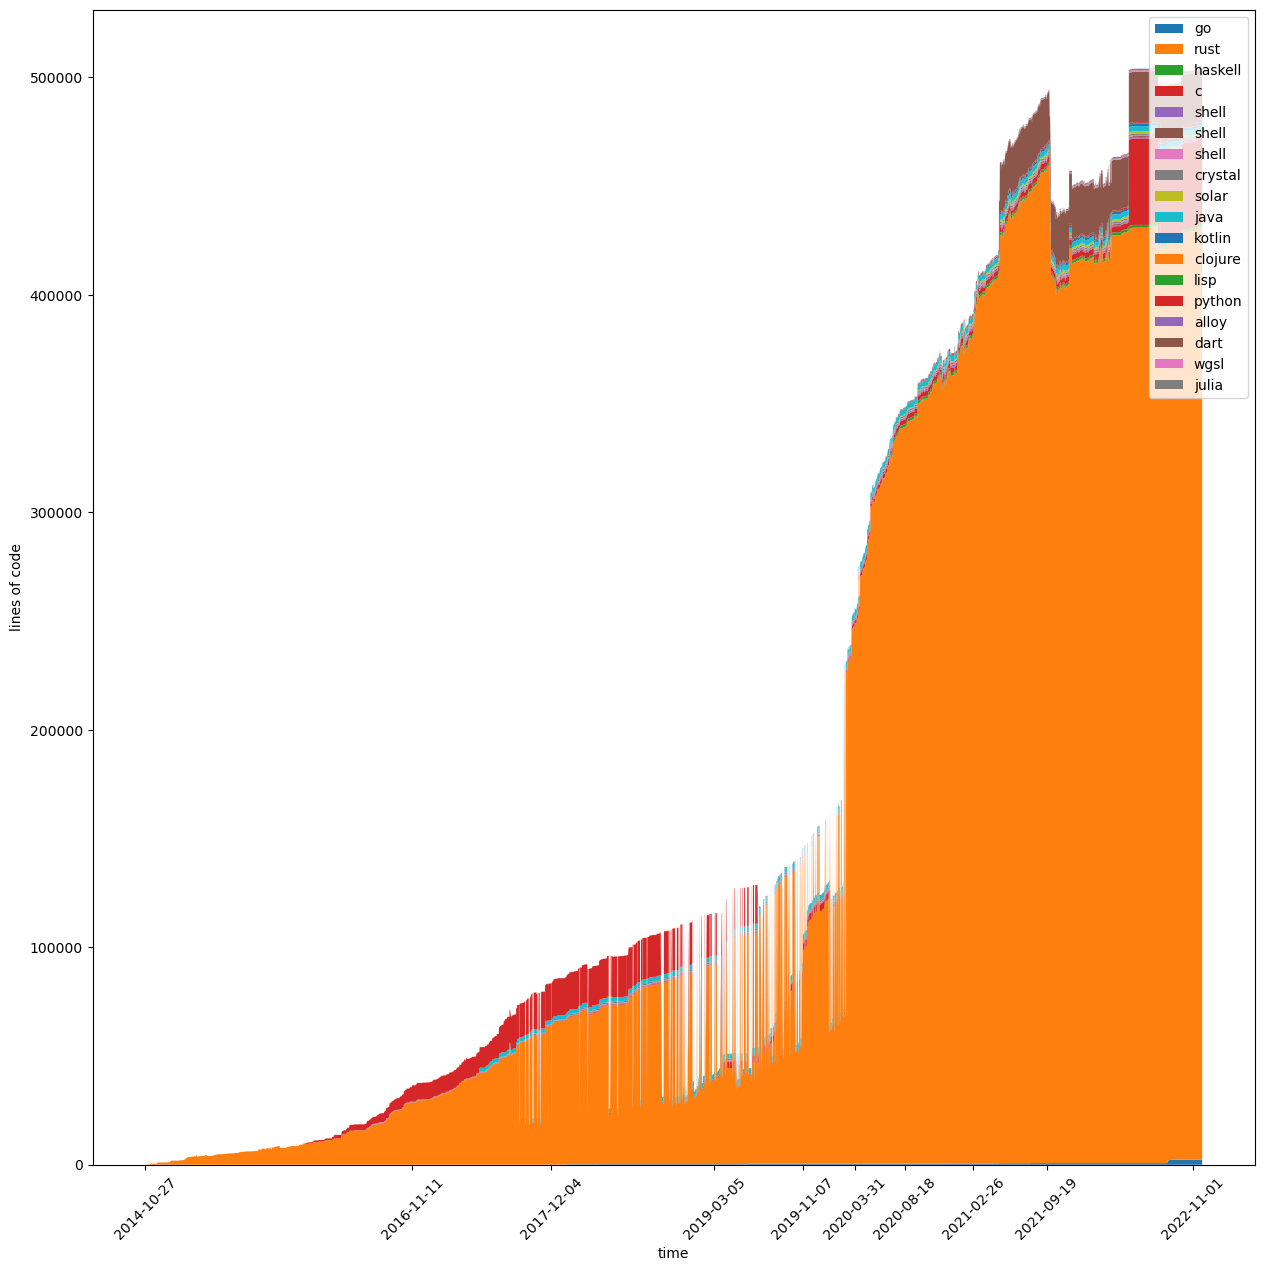

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))

interesting = ['go', 'haskell', 'c', 'shell', 'python', 'crystal', 'solar', 'java', 'kotlin', 'clojure', 'lisp', 'alloy', 'dart', 'wgsl', 'julia']
interesting += ['rust']

def fmt(date):
    return date.split(" ")[0]

xlabels = list(map(fmt, d['date']))
y = []
labels = []
for _, kind in filetypes:
    if kind in ['c++', 'c#', 'javascript']:
        continue
    if kind not in interesting:
        continue

    values = d[kind]
    if len(values) == 0:
        continue

    labels.append(kind)
    y.append(values)

x = d['unix']
ax.stackplot(x, y, labels=labels)
ax.legend()
ax.set_ylabel('lines of code')
ax.set_xlabel('time')

def skip(l, n):
    i = 0
    for elem in l:
        if i%n == 0:
            yield elem
        i+=1

def skipl(l, n):
    return list(skip(l, n))

s = 2000
_ = ax.set_xticks(skipl(x, s), skipl(xlabels, s), rotation=45)
